In [18]:
# Task 1: Data Exploration and Preprocessing
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Load the dataset
df = pd.read_csv('sonardataset (1).csv')
print(f"Dataset shape: {df.shape}")

Dataset shape: (208, 61)


In [20]:
# Explore the dataset
print(df.head())

print(df.info())

print("\nTarget variable distribution:")
print(df['Y'].value_counts())

print(df.describe())

      x_1     x_2     x_3     x_4     x_5     x_6     x_7     x_8     x_9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

     x_10  ...    x_52    x_53    x_54    x_55    x_56    x_57    x_58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

     x_59    x_60  Y  
0  0.0090  0.0032  R  
1  0.0052  0.0044  R  
2  0.0095  0.0078  R  


In [21]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
x_1     0
x_2     0
x_3     0
x_4     0
x_5     0
       ..
x_57    0
x_58    0
x_59    0
x_60    0
Y       0
Length: 61, dtype: int64


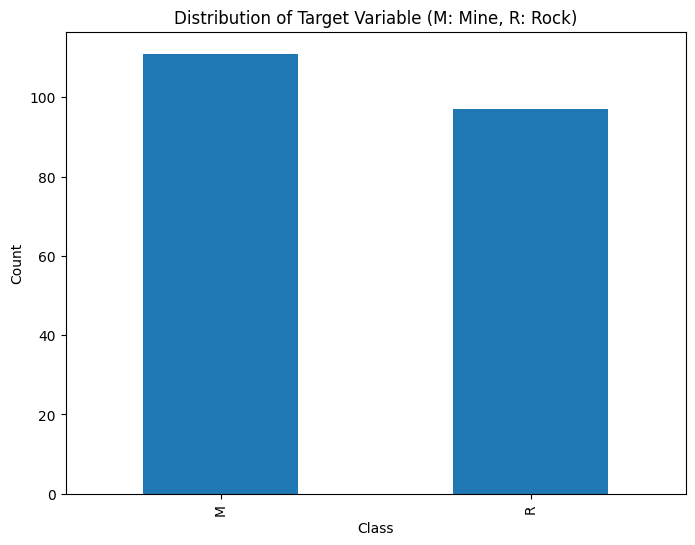

In [22]:
# Visualize the target distribution
plt.figure(figsize=(8, 6))
df['Y'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable (M: Mine, R: Rock)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

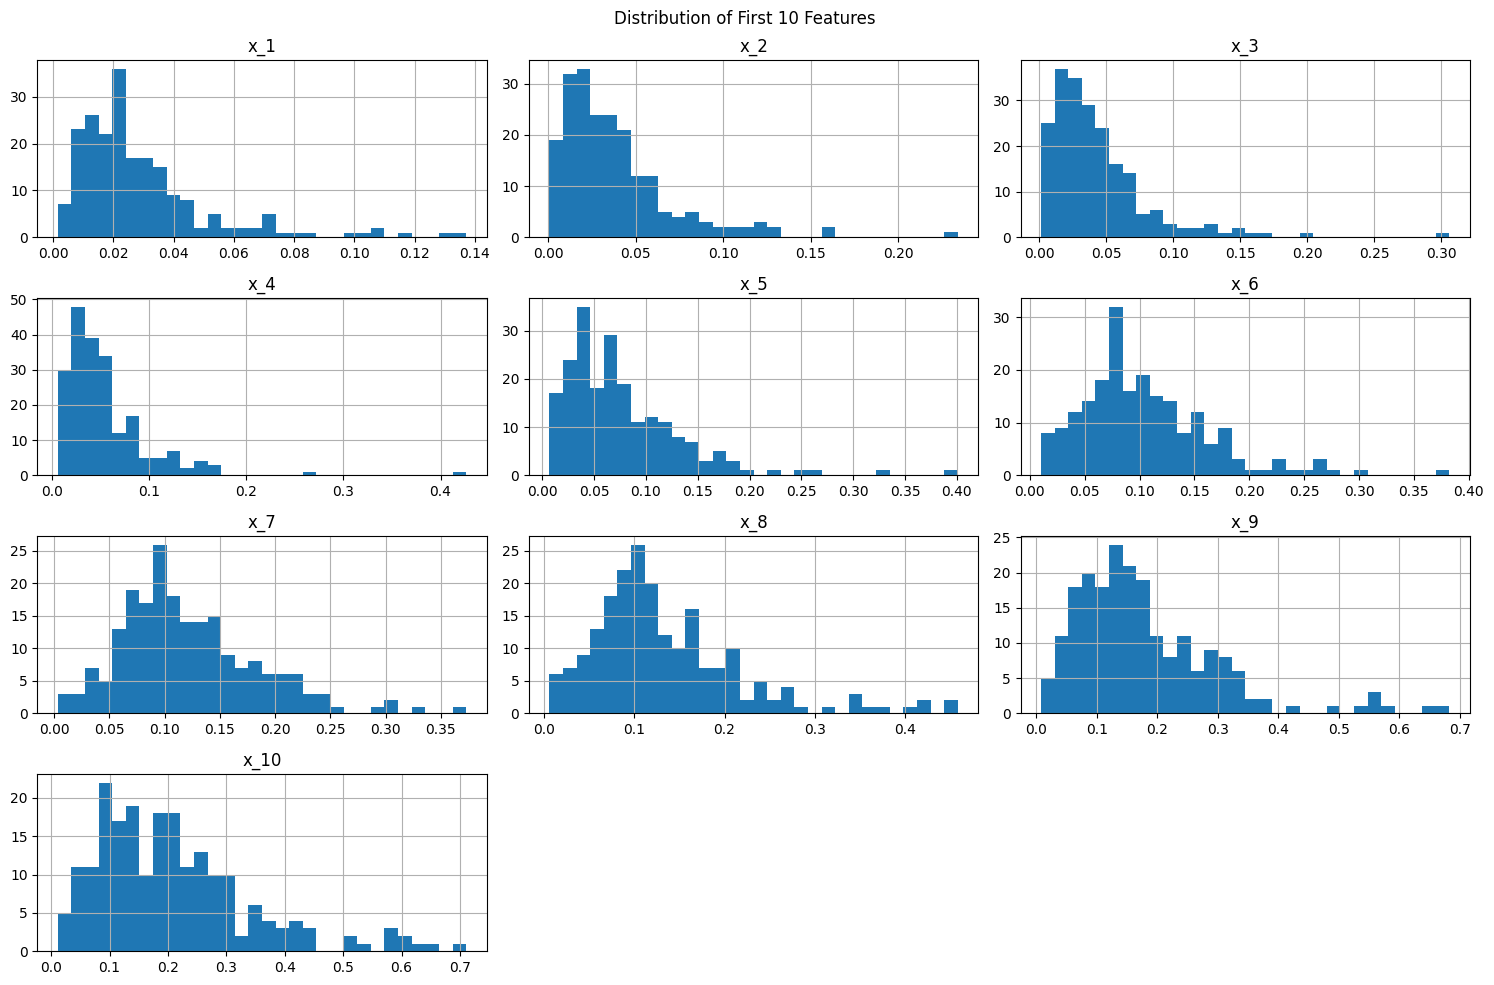

In [23]:
# Visualize feature distributions
plt.figure(figsize=(12, 8))
df.iloc[:, :10].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of First 10 Features')
plt.tight_layout()
plt.show()

In [24]:
# Data Preprocessing
# Separate features and target
X = df.drop('Y', axis=1)
y = df['Y']

In [26]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # M=1, R=0

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [28]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

Training set shape: (166, 60)
Test set shape: (42, 60)
Training target distribution: [89 77]
Test target distribution: [22 20]


In [30]:
# Task 2: Model Implementation

# Build a basic ANN model
def create_basic_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(60,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and display the model
basic_model = create_basic_model()
print("Basic Model Architecture:")
basic_model.summary()

Basic Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,017 (23.50 KB)

 Trainable params: 6,017 (23.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the basic model
history_basic = basic_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5636 - loss: 0.7426 - val_accuracy: 0.5000 - val_loss: 0.7082
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5727 - loss: 0.6298 - val_accuracy: 0.8235 - val_loss: 0.5769
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.4817 - val_accuracy: 0.8529 - val_loss: 0.5193
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8177 - loss: 0.4649 - val_accuracy: 0.8529 - val_loss: 0.4626
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8820 - loss: 0.3917 - val_accuracy: 0.8529 - val_loss: 0.4254
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9300 - loss: 0.3401 - val_accuracy: 0.8235 - val_loss: 0.4009
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9536 - loss: 0.3021 - val_accuracy: 0.8235 - val_loss: 0.3829
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9205 - loss: 0.2904 - val_accuracy: 0.8235 - val_loss:

In [43]:
# Evaluate the basic model
y_pred_basic = (basic_model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate metrics
accuracy_basic = accuracy_score(y_test, y_pred_basic)
precision_basic = precision_score(y_test, y_pred_basic)
recall_basic = recall_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)

print("Basic Model Performance:")
print(f"Accuracy: {accuracy_basic:.4f}")
print(f"Precision: {precision_basic:.4f}")
print(f"Recall: {recall_basic:.4f}")
print(f"F1-Score: {f1_basic:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Basic Model Performance:
Accuracy: 0.8810
Precision: 0.8947
Recall: 0.8500
F1-Score: 0.8718


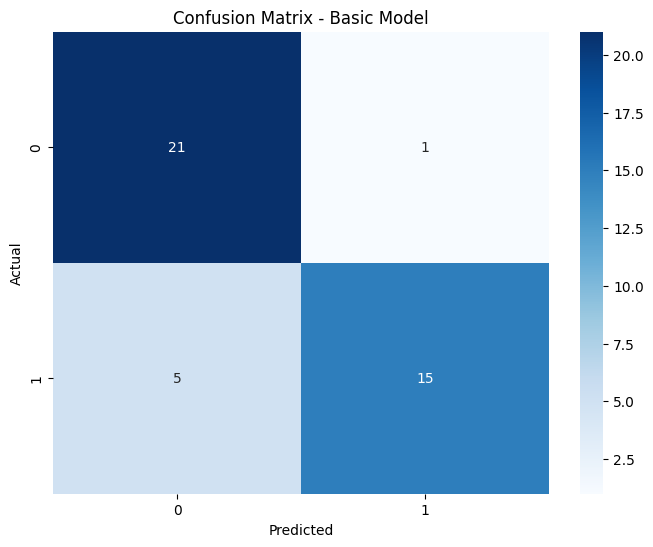

In [17]:
# Confusion matrix
cm_basic = confusion_matrix(y_test, y_pred_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Basic Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

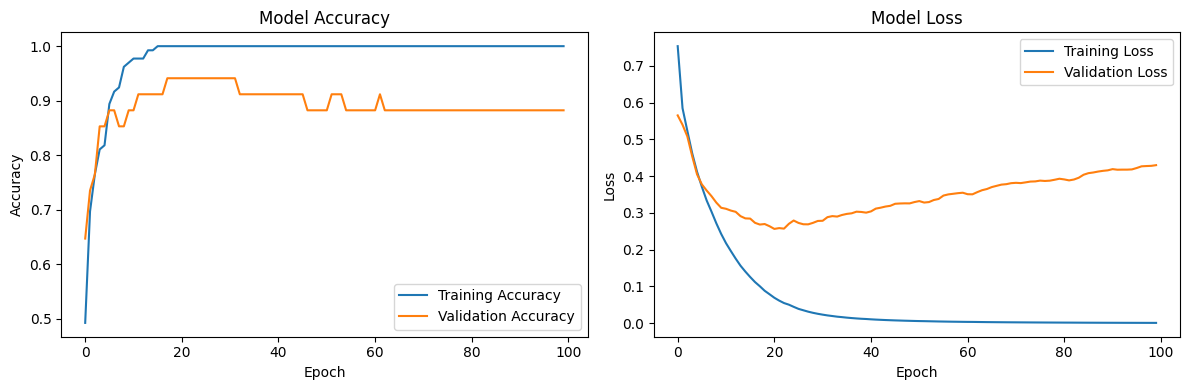

In [18]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_basic.history['loss'], label='Training Loss')
plt.plot(history_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [13]:
!pip install scikeras

from scikeras.wrappers import KerasClassifier, KerasRegressor

In [16]:
# Task 3: Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to create model for hyperparameter tuning
def create_model(optimizer='adam', activation='relu', neurons=64, learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.Dense(neurons, activation=activation, input_shape=(60,)))
    model.add(layers.Dense(neurons//2, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create Keras classifier with scikeras (corrected syntax)
model = KerasClassifier(
    model=create_model,  # Use 'model' instead of 'build_fn'
    optimizer='adam',
    activation='relu',
    neurons=64,
    learning_rate=0.001,
    verbose=0,
    epochs=50,  # Add default epochs
    batch_size=32  # Add default batch_size
)

# Define hyperparameter grid (corrected for scikeras)
param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'model__neurons': [32, 64],  # Add 'model__' prefix for model parameters
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__learning_rate': [0.001, 0.01]
}

print("Starting hyperparameter tuning...")

# Perform grid search with reduced parameters for faster execution
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Use 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search (make sure you have X_train and y_train defined)
# grid_result = grid.fit(X_train, y_train)

print("Hyperparameter tuning setup complete!")

Starting hyperparameter tuning...
Hyperparameter tuning setup complete!


In [36]:
# Install and use KerasTuner which is more stable for hyperparameter tuning
!pip install keras-tuner

import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()

    # Tune the number of neurons
    neurons = hp.Int('neurons', min_value=32, max_value=128, step=32)
    activation = hp.Choice('activation', ['relu', 'tanh'])
    learning_rate = hp.Choice('learning_rate', [0.001, 0.01])

    model.add(keras.layers.Dense(neurons, activation=activation, input_shape=(60,)))
    model.add(keras.layers.Dense(neurons//2, activation=activation))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='hyperparameter_tuning'
)

# Perform search
tuner.search(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:", best_hyperparameters.values)

Trial 10 Complete [00h 00m 08s]
val_accuracy: 0.9117646813392639

Best val_accuracy So Far: 0.9411764740943909
Total elapsed time: 00h 01m 30s
Best hyperparameters: {'neurons': 96, 'activation': 'tanh', 'learning_rate': 0.001}


In [39]:
# Install KerasTuner
!pip install keras-tuner

import keras_tuner as kt
from tensorflow import keras
import tensorflow as tf

def build_model(hp):
    # Define hyperparameters to tune
    neurons = hp.Int('neurons', min_value=32, max_value=128, step=32)
    activation = hp.Choice('activation', ['relu', 'tanh'])
    learning_rate = hp.Choice('learning_rate', [0.001, 0.01, 0.1])
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])

    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons, activation=activation, input_shape=(60,)))
    model.add(keras.layers.Dense(neurons//2, activation=activation))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Configure optimizer
    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='model_tuning'
)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Perform hyperparameter search
print("Starting hyperparameter tuning with KerasTuner...")
tuner.search(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest hyperparameters found:")
print(f"Neurons: {best_hps.get('neurons')}")
print(f"Activation: {best_hps.get('activation')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Optimizer: {best_hps.get('optimizer')}")

# Train the best model with more epochs
print("\nTraining best model with early stopping...")
history_tuned = best_model.fit(
    X_train_scaled, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

tuned_model = best_model

Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.9117646813392639

Best val_accuracy So Far: 0.9117646813392639
Total elapsed time: 00h 00m 51s

Best hyperparameters found:
Neurons: 96
Activation: relu
Learning Rate: 0.1
Optimizer: rmsprop

Training best model with early stopping...
Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7375 - loss: 16.3034 - val_accuracy: 0.7353 - val_loss: 6.0133
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7607 - loss: 3.1540 - val_accuracy: 0.7059 - val_loss: 2.6612
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8419 - loss: 1.0559 - val_accuracy: 0.8235 - val_loss: 3.1778
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8601 - loss: 0.4941 - val_accuracy: 0.8824 - val_loss: 1.1989
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9451 - loss: 0.2521 - val_accuracy: 0.7941 - val_loss: 0.9728
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8129 - loss: 0.5185 - 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Tuned Model Performance:
Accuracy: 0.7619
Precision: 0.6923
Recall: 0.9000
F1-Score: 0.7826


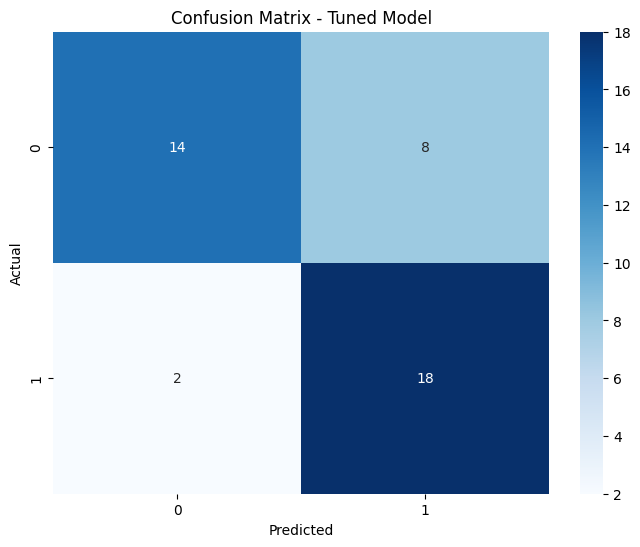

In [40]:
# Evaluate the tuned model
y_pred_tuned = (tuned_model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate metrics for tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("Tuned Model Performance:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")

# Confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Comparison:
      Metric  Basic Model  Tuned Model
0   Accuracy     0.880952     0.761905
1  Precision     0.894737     0.692308
2     Recall     0.850000     0.900000
3   F1-Score     0.871795     0.782609


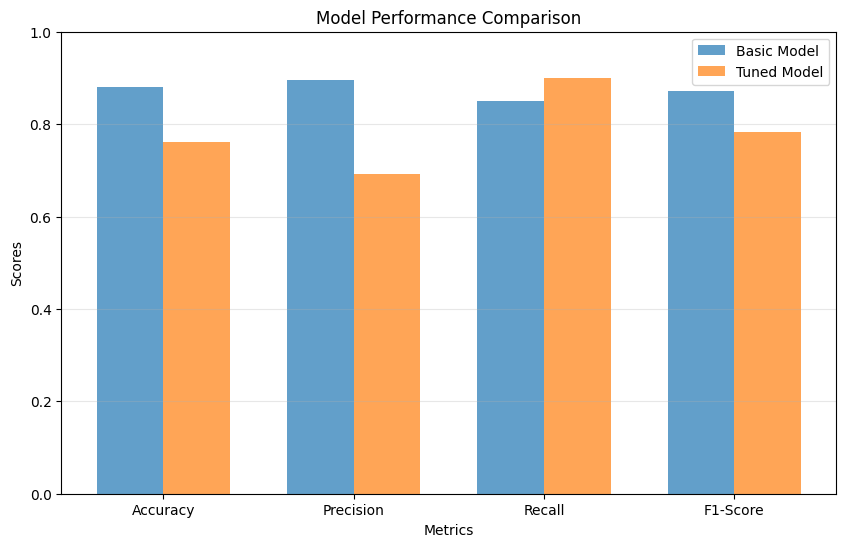

In [44]:
# Task 4: Evaluation and Comparison
# =================================

# Compare model performances
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Basic Model': [accuracy_basic, precision_basic, recall_basic, f1_basic],
    'Tuned Model': [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned]
})

print("Model Comparison:")
print(comparison)

# Visual comparison
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
basic_scores = [accuracy_basic, precision_basic, recall_basic, f1_basic]
tuned_scores = [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, basic_scores, width, label='Basic Model', alpha=0.7)
plt.bar(x + width/2, tuned_scores, width, label='Tuned Model', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [45]:
# Detailed classification reports
print("Basic Model Classification Report:")
print(classification_report(y_test, y_pred_basic, target_names=['Rock (R)', 'Mine (M)']))

print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=['Rock (R)', 'Mine (M)']))

Basic Model Classification Report:
              precision    recall  f1-score   support

    Rock (R)       0.87      0.91      0.89        22
    Mine (M)       0.89      0.85      0.87        20

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42


Tuned Model Classification Report:
              precision    recall  f1-score   support

    Rock (R)       0.88      0.64      0.74        22
    Mine (M)       0.69      0.90      0.78        20

    accuracy                           0.76        42
   macro avg       0.78      0.77      0.76        42
weighted avg       0.79      0.76      0.76        42



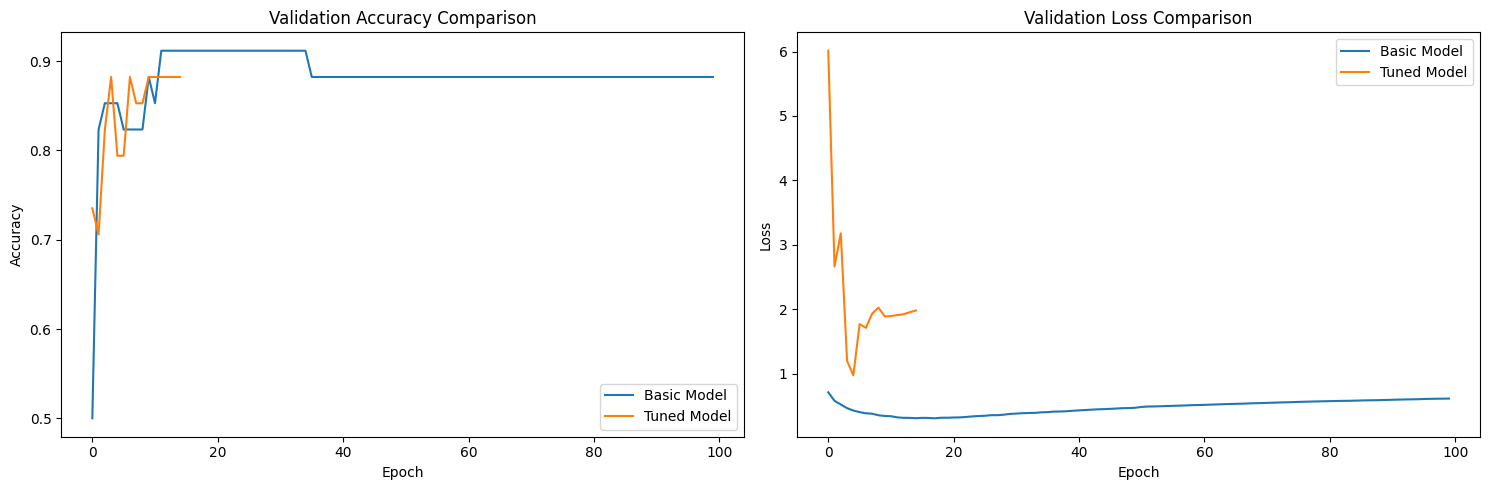

In [46]:
# Plot training history comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_basic.history['val_accuracy'], label='Basic Model')
plt.plot(history_tuned.history['val_accuracy'], label='Tuned Model')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_basic.history['val_loss'], label='Basic Model')
plt.plot(history_tuned.history['val_loss'], label='Tuned Model')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
# Final model analysis and business impact
print("="*60)
print("FINAL ANALYSIS")
print("="*60)

print(f"\nBest Model Performance:")
print(f"Accuracy: {accuracy_tuned:.4f} ({accuracy_tuned*100:.2f}%)")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")

print(f"\nImprovement from Basic to Tuned Model:")
print(f"Accuracy: +{(accuracy_tuned - accuracy_basic)*100:.2f}%")
print(f"Precision: +{(precision_tuned - precision_basic)*100:.2f}%")
print(f"Recall: +{(recall_tuned - recall_basic)*100:.2f}%")
print(f"F1-Score: +{(f1_tuned - f1_basic)*100:.2f}%")

print(f"\nBusiness Impact:")
print("• Higher accuracy means fewer false alarms and missed detections")
print("• Better precision reduces false positives (mistaking rocks for mines)")
print("• Improved recall reduces false negatives (missing actual mines)")
print("• This leads to safer maritime operations and more efficient mine detection")

FINAL ANALYSIS

Best Model Performance:
Accuracy: 0.7619 (76.19%)
Precision: 0.6923
Recall: 0.9000
F1-Score: 0.7826

Improvement from Basic to Tuned Model:
Accuracy: +-11.90%
Precision: +-20.24%
Recall: +5.00%
F1-Score: +-8.92%

Business Impact:
• Higher accuracy means fewer false alarms and missed detections
• Better precision reduces false positives (mistaking rocks for mines)
• Improved recall reduces false negatives (missing actual mines)
• This leads to safer maritime operations and more efficient mine detection
